In [2]:
! git clone https://github.com/Nelson-Gon/cytounet.git

fatal: destination path 'cytounet' already exists and is not an empty directory.


In [3]:
%cd cytounet

/content/cytounet


In [4]:
from cytounet.model import *
from cytounet.data import *
from cytounet.augmentation import *

Using TensorFlow backend.


In [5]:
!  ls examples/BBBC003_v1/

images	truth


In [6]:
data_generator_args =  dict(rotation_range=45,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [7]:
! if [ ! -d "aug" ]; then mkdir aug;fi

In [18]:
train_gen = generate_train_data(5, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 12, target_size = (256, 256), save_to_dir="aug")

In [9]:
for index, batch in enumerate(train_gen):
  if index >= 5:
    break

Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.


In [ ]:
! if [ ! -d "aug/images" ]; then echo "Making directory" && mkdir aug/images aug/masks; else ls aug/images;fi

In [11]:
! mv aug/image_* aug/images && mv aug/mask_* aug/masks && ls aug/masks | wc -l

439


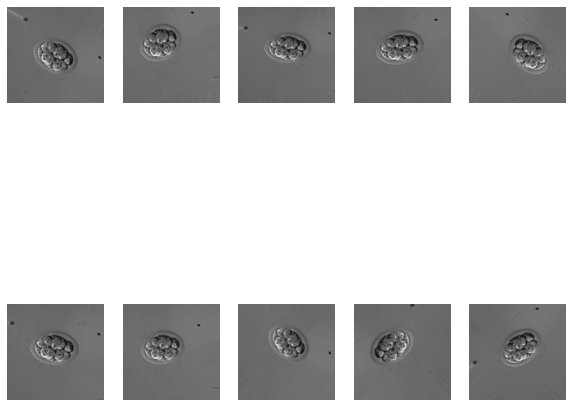

In [13]:
show_images("aug/images", number=10)

In [32]:
model = unet(input_size = (256, 256, 1), optimiser="SGD",metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-6)

In [33]:
history = model.fit_generator(train_gen, steps_per_epoch=300,epochs=15)

Epoch 1/15
300/300 [==============================] - 366s 1s/step - loss: 1.2076 - accuracy: 0.8456
Epoch 2/15
300/300 [==============================] - 359s 1s/step - loss: 0.4819 - accuracy: 0.9080
Epoch 3/15
300/300 [==============================] - 359s 1s/step - loss: 0.4187 - accuracy: 0.9115
Epoch 4/15
300/300 [==============================] - 358s 1s/step - loss: 0.3853 - accuracy: 0.9135
Epoch 5/15
300/300 [==============================] - 361s 1s/step - loss: 0.3607 - accuracy: 0.9135
Epoch 6/15
300/300 [==============================] - 362s 1s/step - loss: 0.3498 - accuracy: 0.9129
Epoch 7/15
300/300 [==============================] - 362s 1s/step - loss: 0.3344 - accuracy: 0.9140
Epoch 8/15
300/300 [==============================] - 359s 1s/step - loss: 0.3233 - accuracy: 0.9142
Epoch 9/15
300/300 [==============================] - 359s 1s/step - loss: 0.3184 - accuracy: 0.9140
Epoch 10/15
300/300 [==============================] - 358s 1s/step - loss: 0.3131 - accura

In [34]:
test_images = generate_test_data("aug/images", 10, image_suffix="png")

In [35]:
model.save("unet_embryo.hdf5")

In [36]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [37]:
results = model.predict_generator(test_images, 10, verbose=1)

10/10 [==============================] - 1s 147ms/step


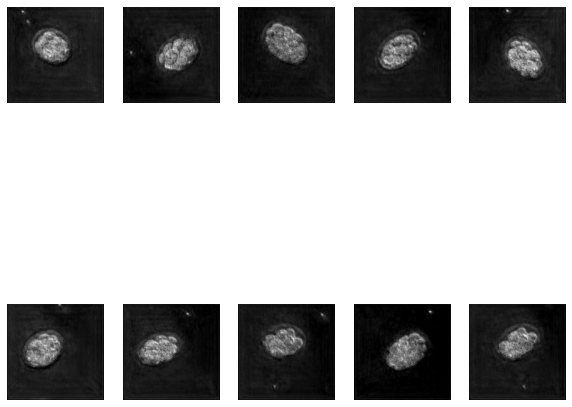

In [38]:
show_images(results, number = 10)

In [39]:
! if [ ! -d "predictions" ];then mkdir predictions;fi

In [42]:
# use save_predictions for tif
save_images("predictions", results,"predicted_", image_suffix="png")

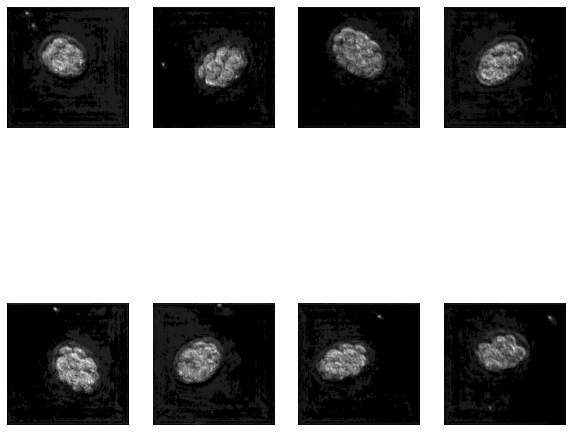

In [43]:
show_images("predictions",image_suffix="png",number = 8)